Duplicate rows detected, potential dark pattern!


<ipython-input-2-7e4530cfe1b2>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y="category", palette="viridis")


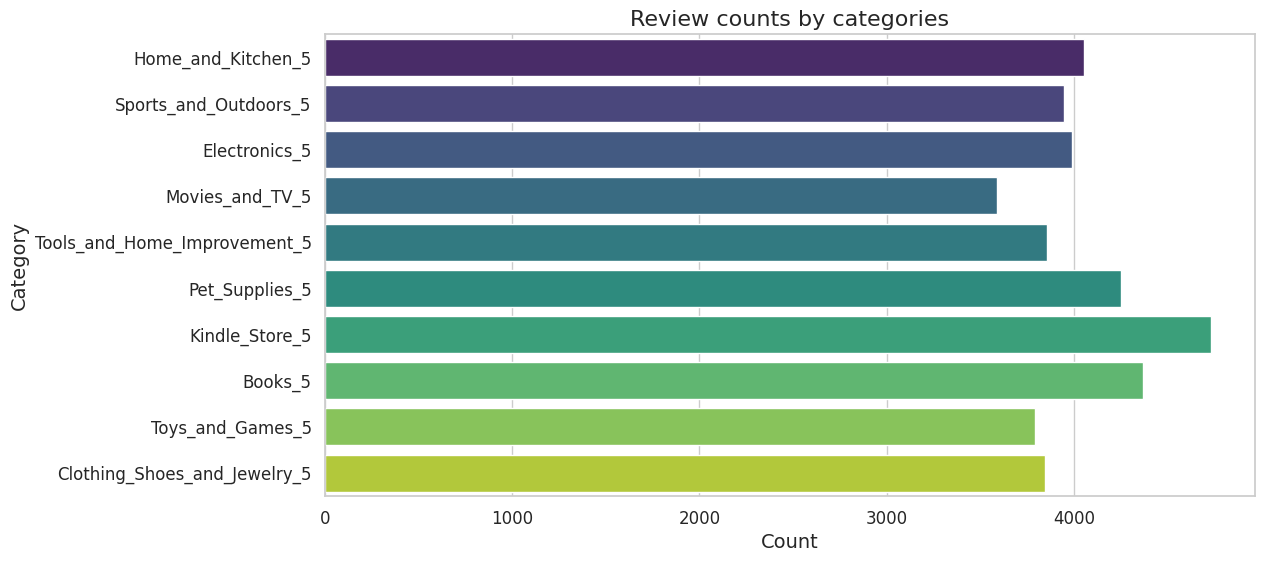

<ipython-input-2-7e4530cfe1b2>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="label", palette="magma")


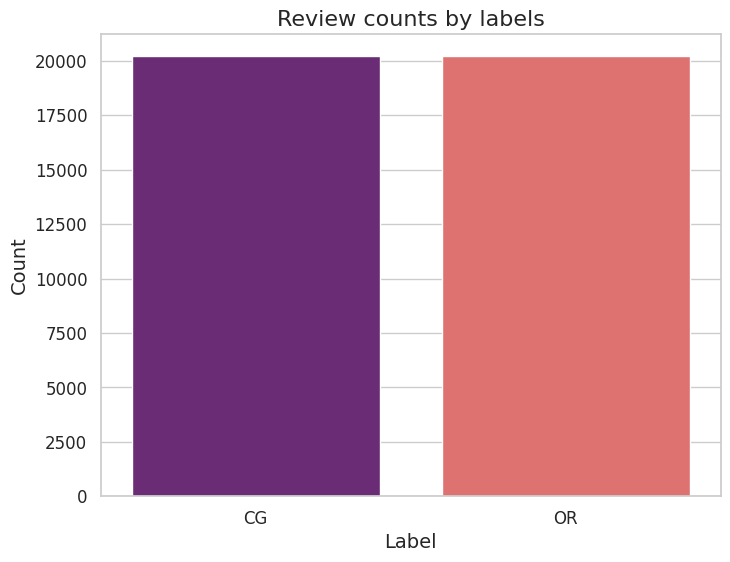

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime




# Function to read CSV file with error handling
def read_csv_with_errors(file_path):
    rows = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for line_num, row in enumerate(reader, start=1):
            try:
                rows.append(row)
            except Exception as e:
                print(f"Error reading line {line_num}: {e}")
    return rows

# Load the CSV file into a DataFrame, handling errors
csv_data = read_csv_with_errors("/content/fake reviews dataset.csv")
data = pd.DataFrame(csv_data[1:], columns=csv_data[0])

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows detected, potential dark pattern!")

# Check for missing values
missing_values = data.isnull().sum().sum()
if missing_values > 0:
    print("Missing values detected, potential dark pattern!")

# Check for abnormal ratings
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
abnormal_ratings = data[(data['rating'] < 0) | (data['rating'] > 5)]
if not abnormal_ratings.empty:
    print("Abnormal ratings detected, potential dark pattern!")

# Text Analysis - Sentiment Analysis
# Text Analysis - Sentiment Analysis
if 'text' in data.columns:
    try:
        data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    except Exception as e:
        print(f"Error in text analysis: {e}")



# Time-based Analysis
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data['month'] = data['date'].dt.month

# User Behavior Analysis
if 'user_id' in data.columns:
    user_review_counts = data['user_id'].value_counts()
    suspicious_users = user_review_counts[user_review_counts > user_review_counts.mean() * 2]  # Example threshold

# Set seaborn style
sns.set(style="whitegrid")

# Plot review counts by categories
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y="category", palette="viridis")
plt.title("Review counts by categories", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Category", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot review counts by labels
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="label", palette="magma")
plt.title("Review counts by labels", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
